In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Explore the structure of the dataset
print(data.head())
print(data.info())

# Check for missing values
print("Missing values:\n", data.isnull().sum())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

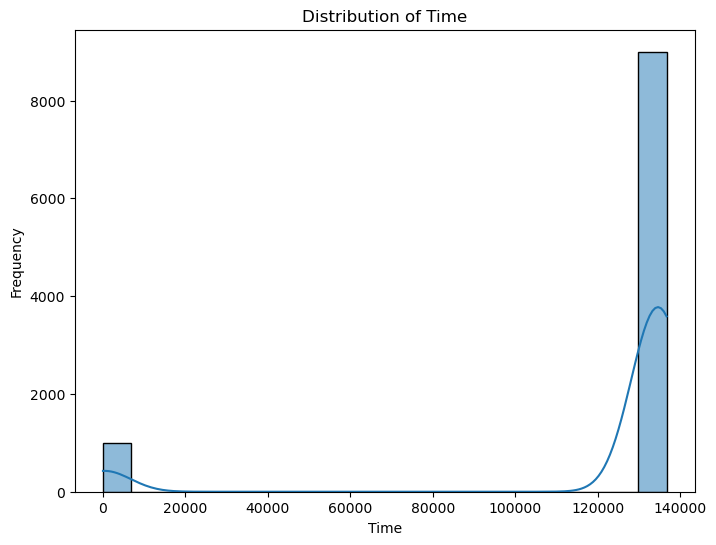

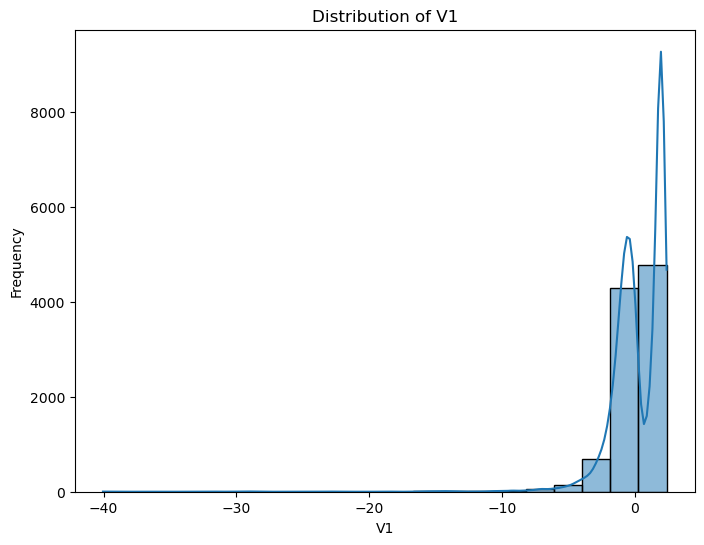

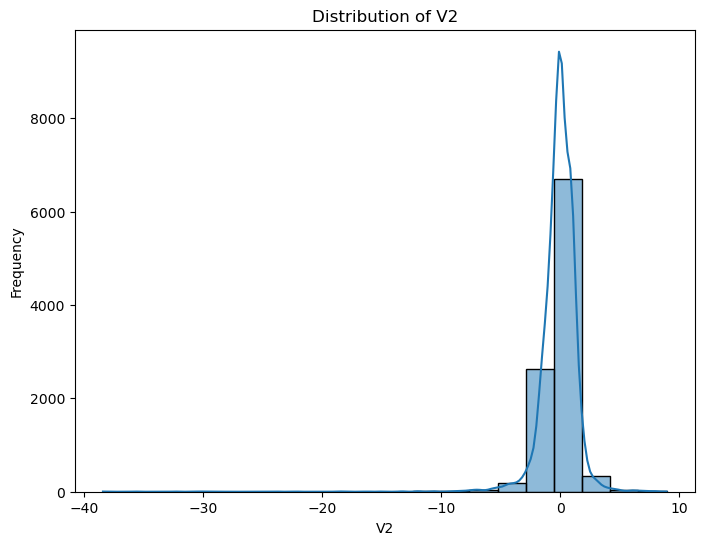

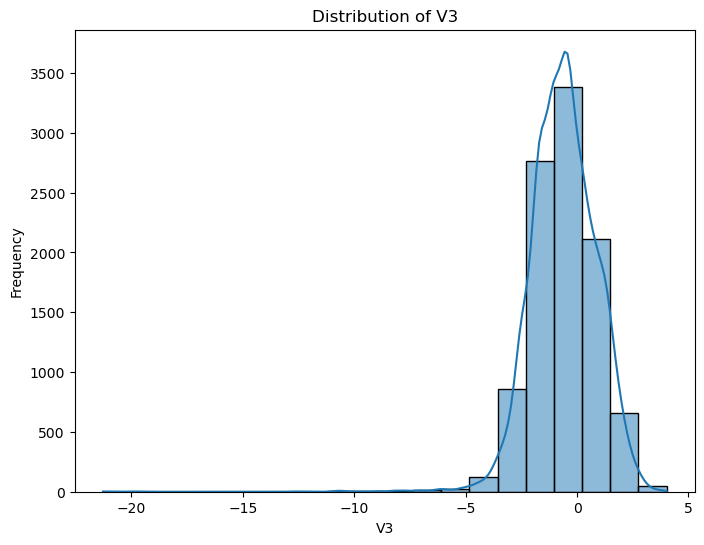

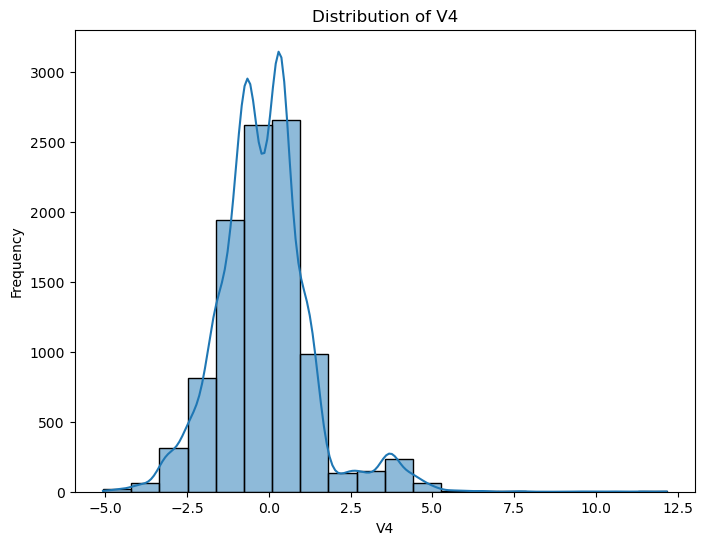

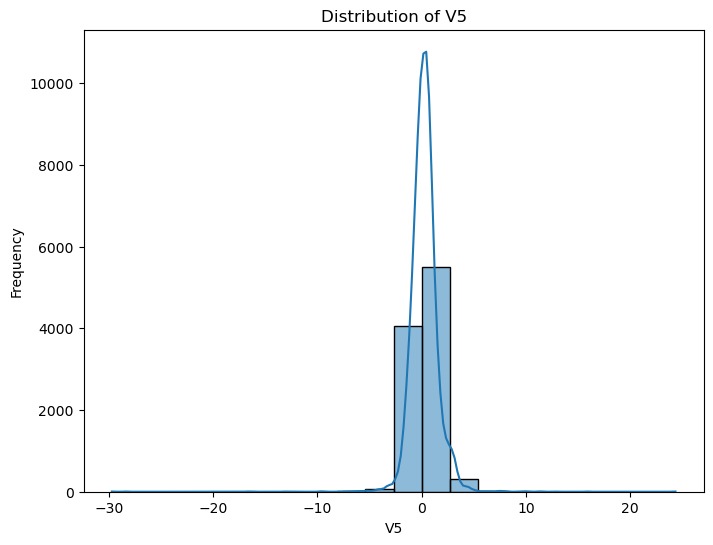

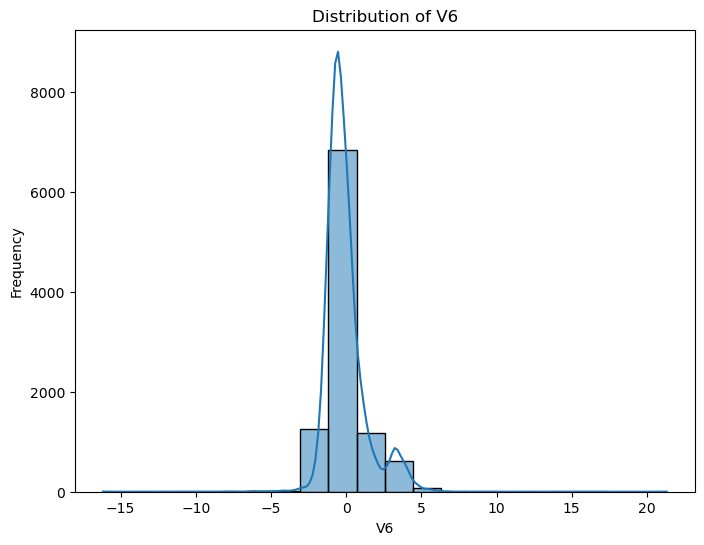

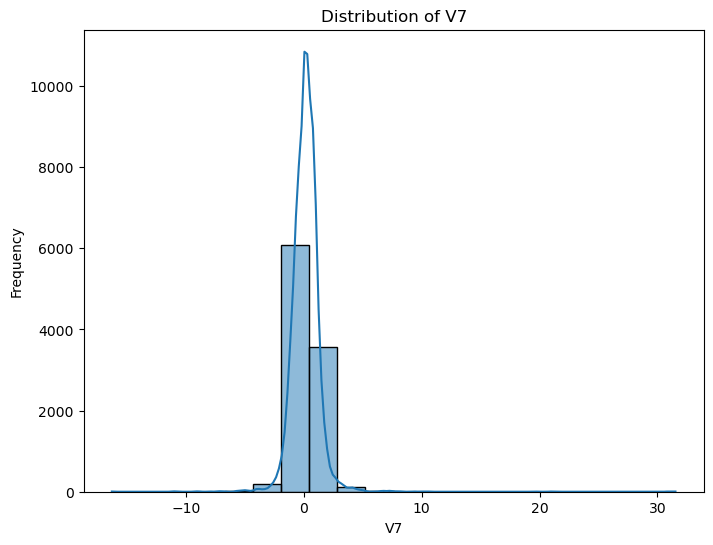

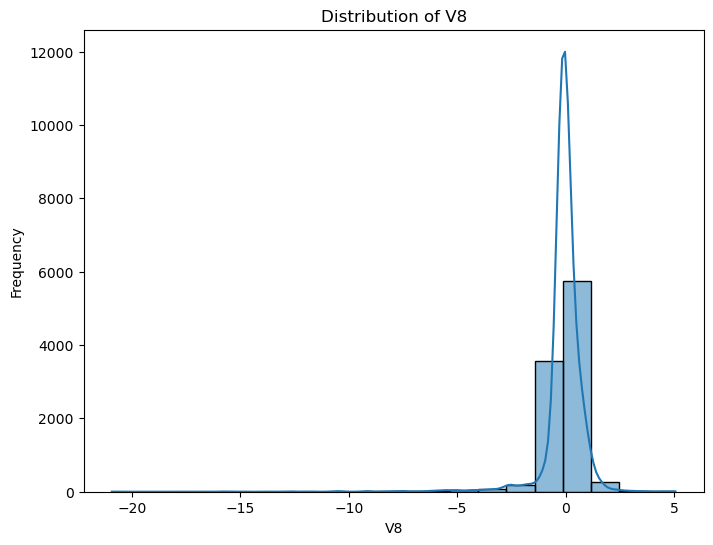

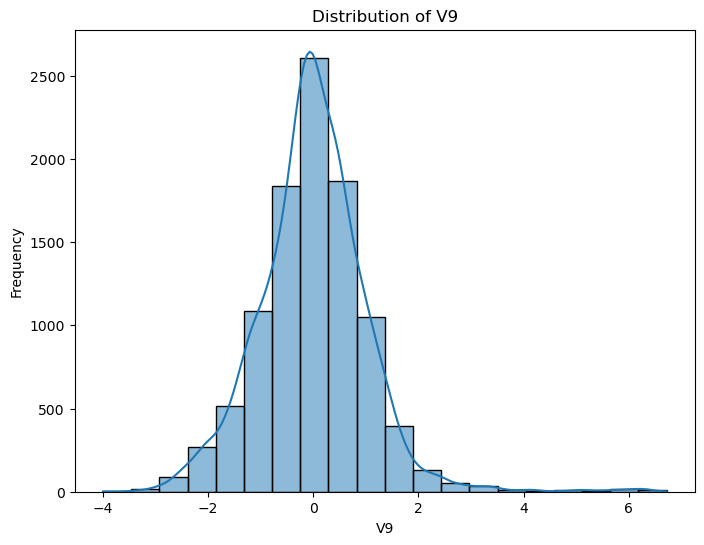

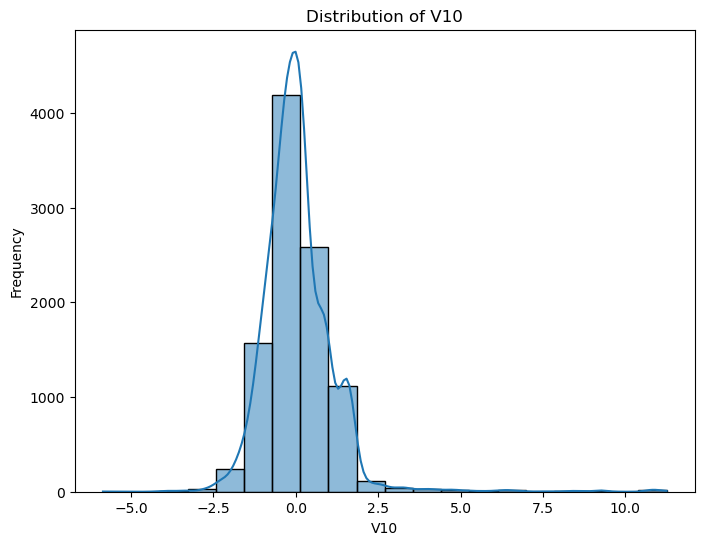

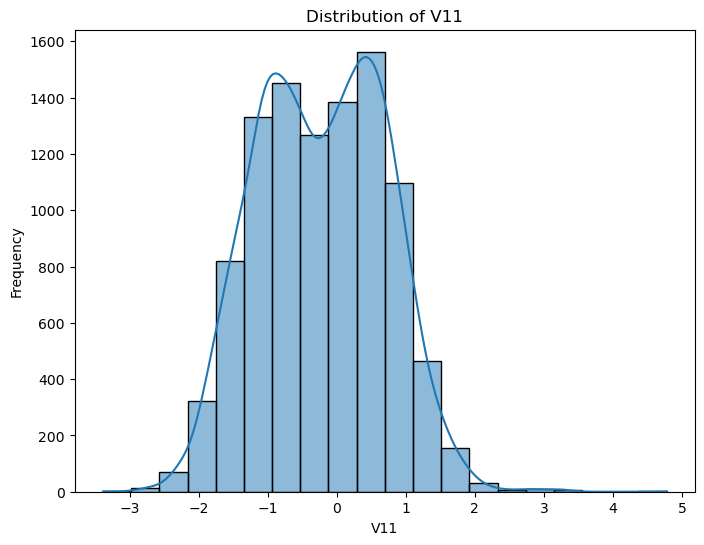

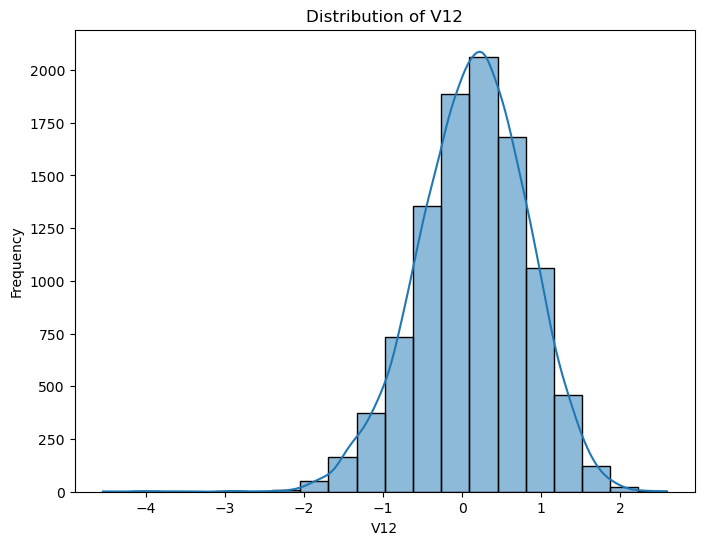

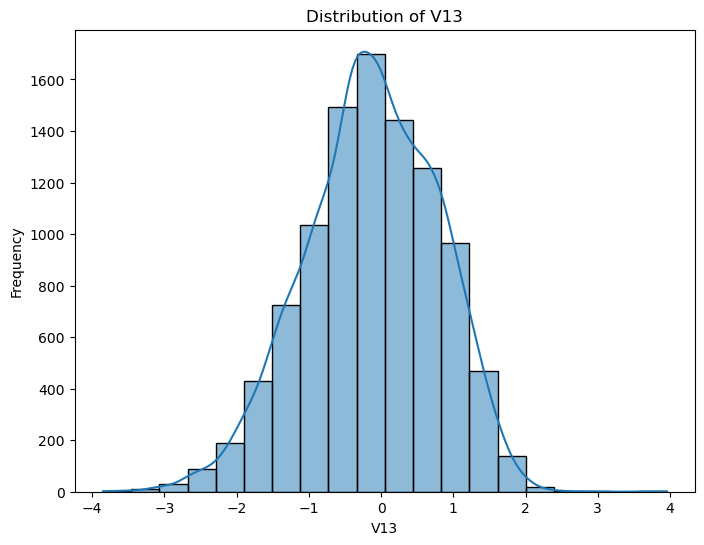

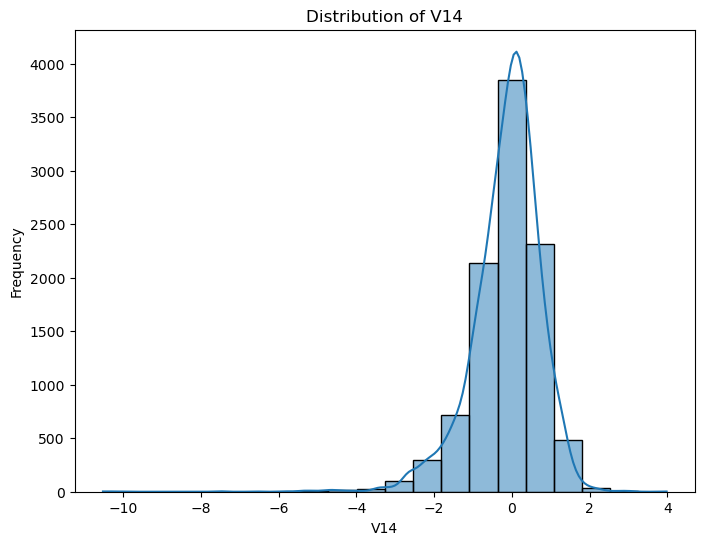

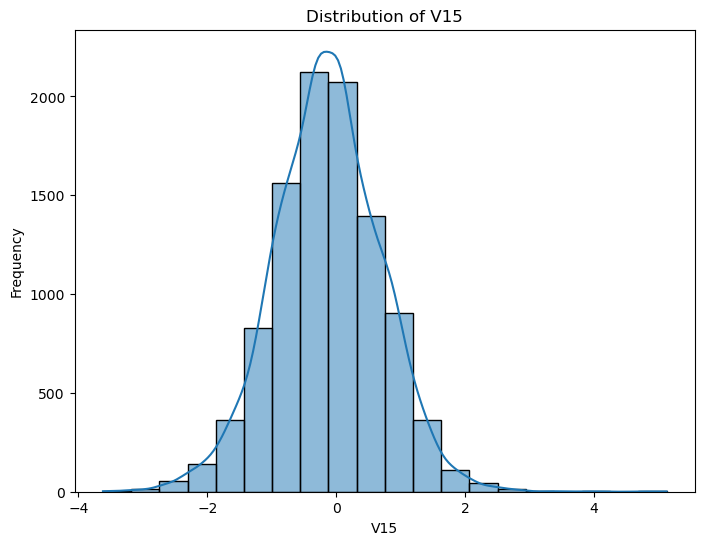

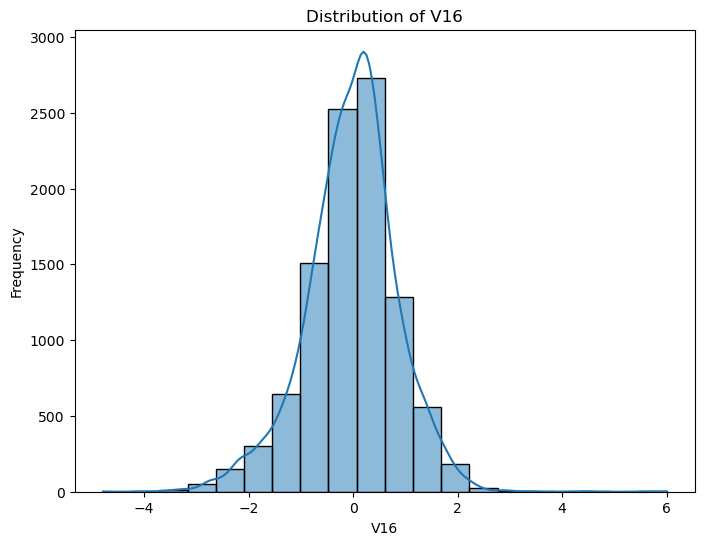

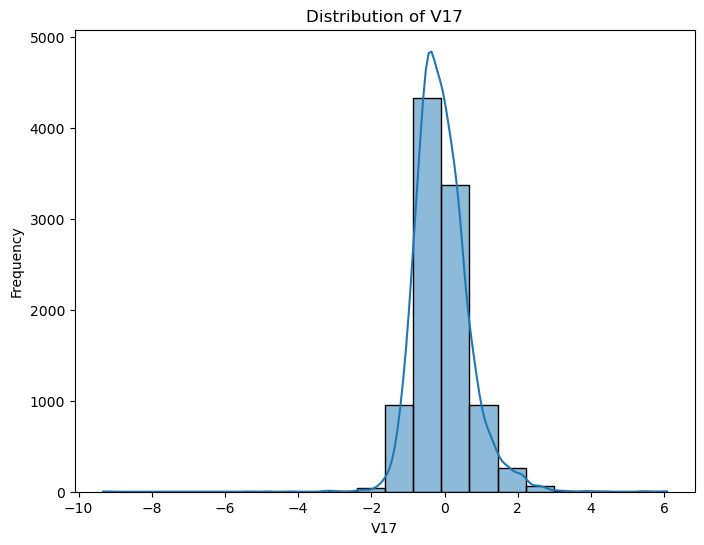

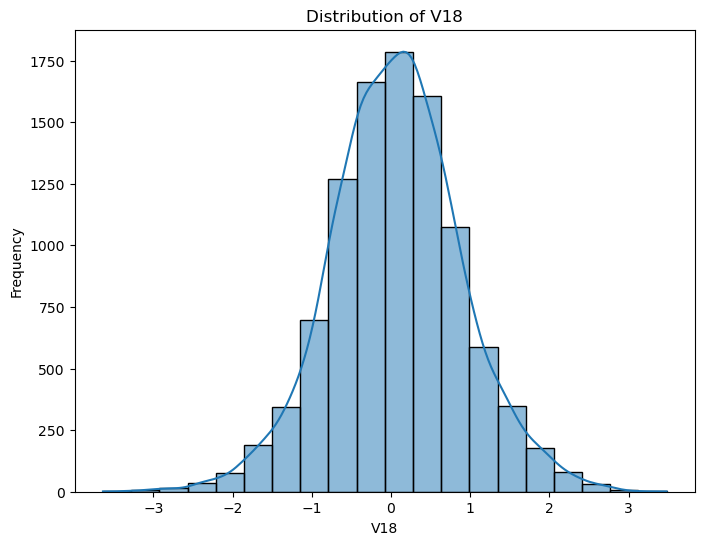

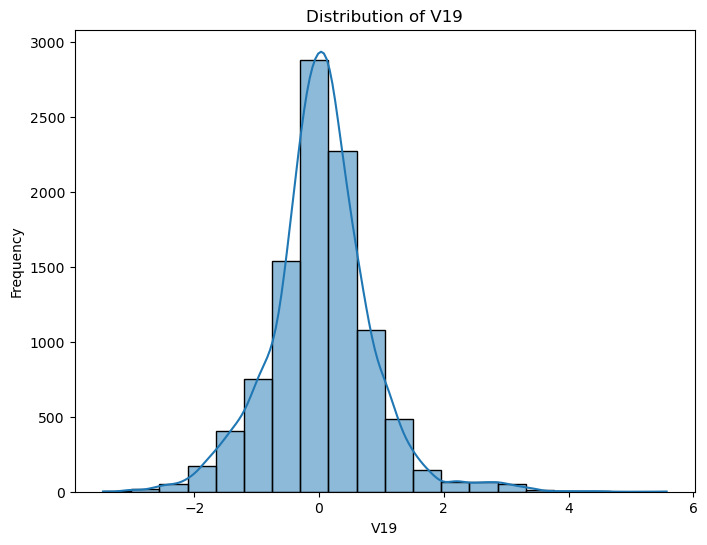

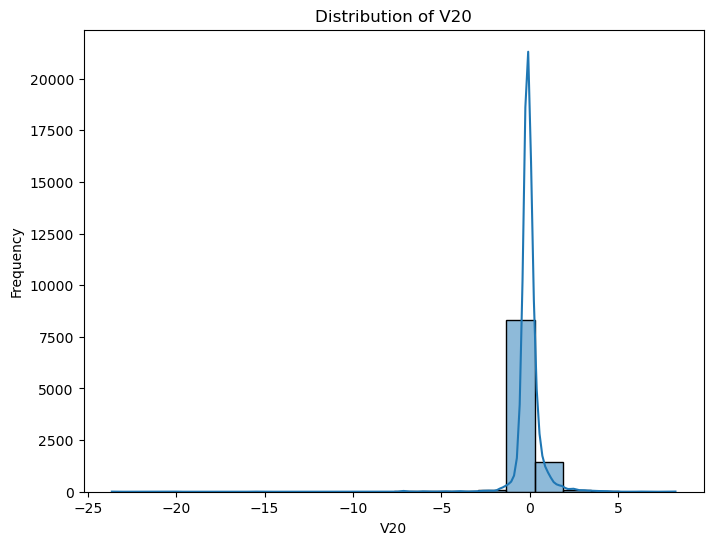

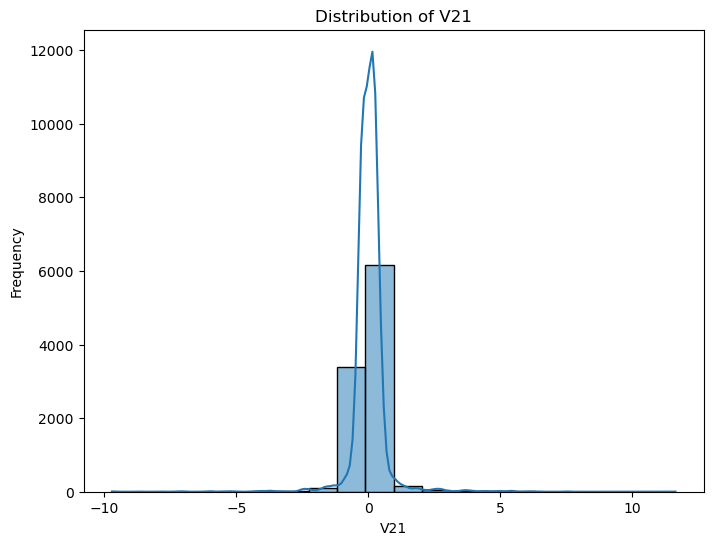

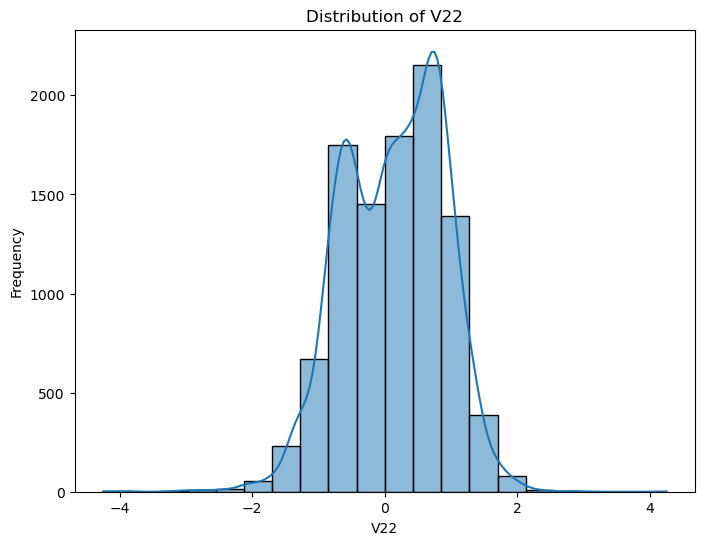

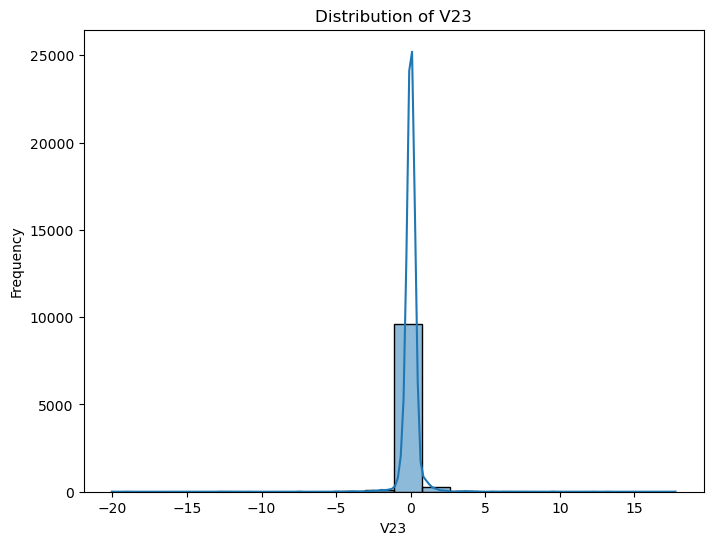

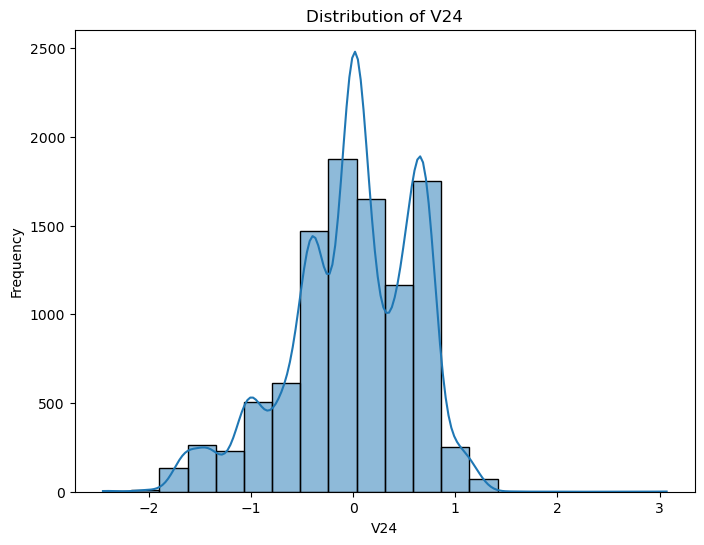

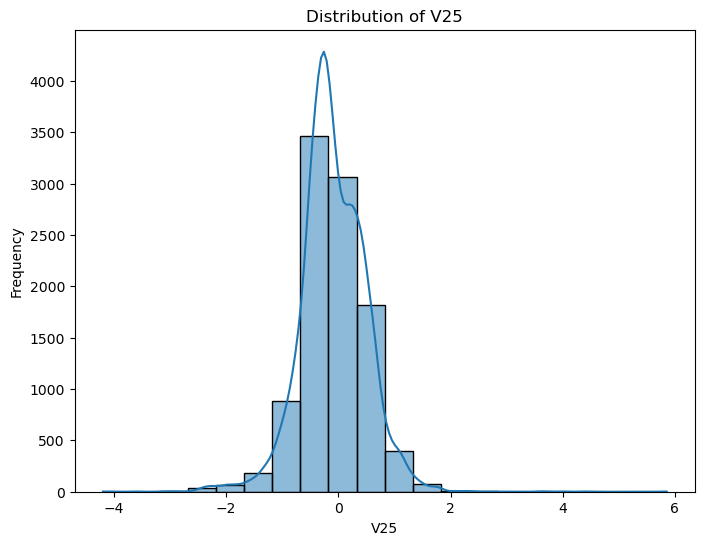

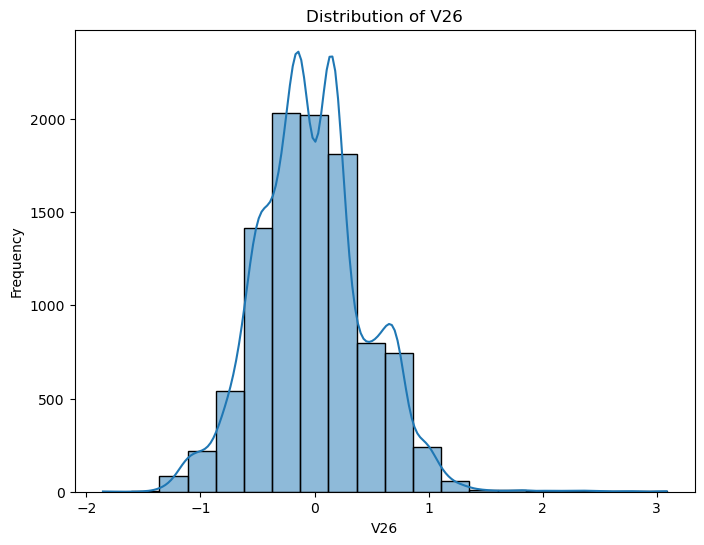

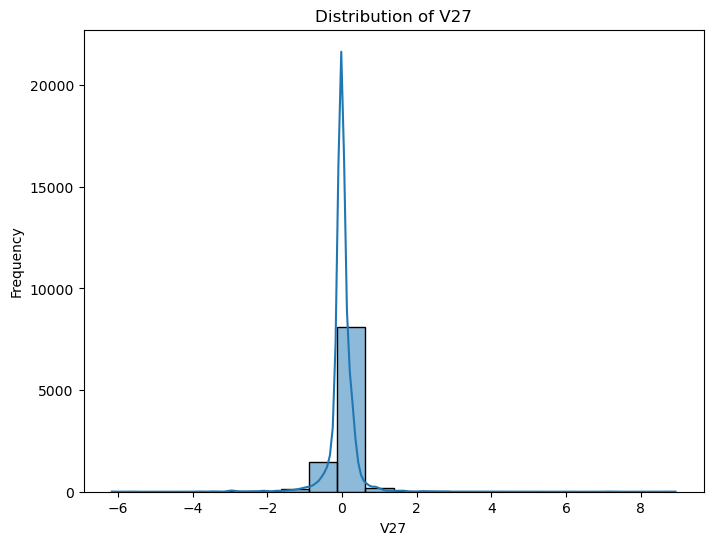

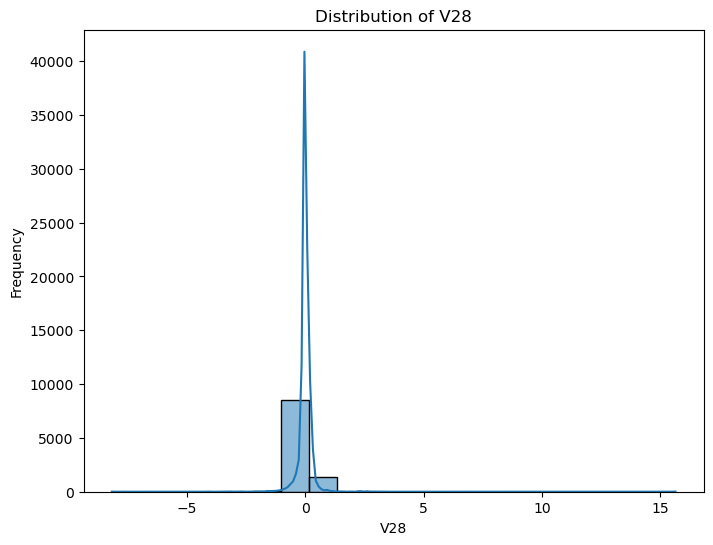

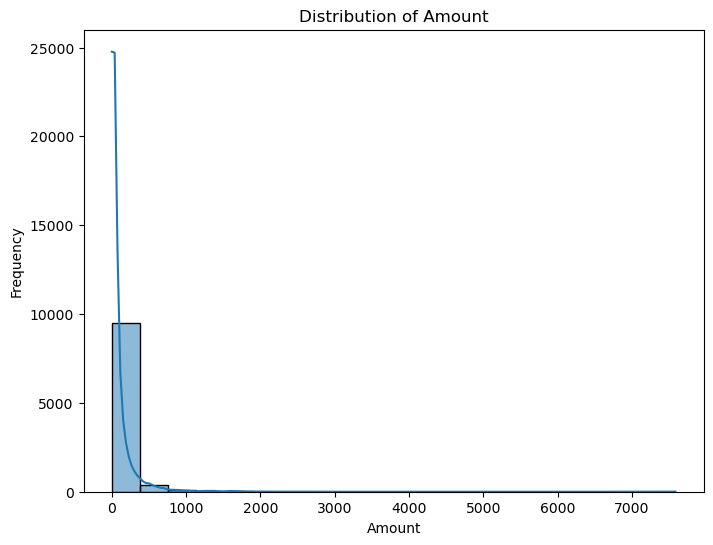

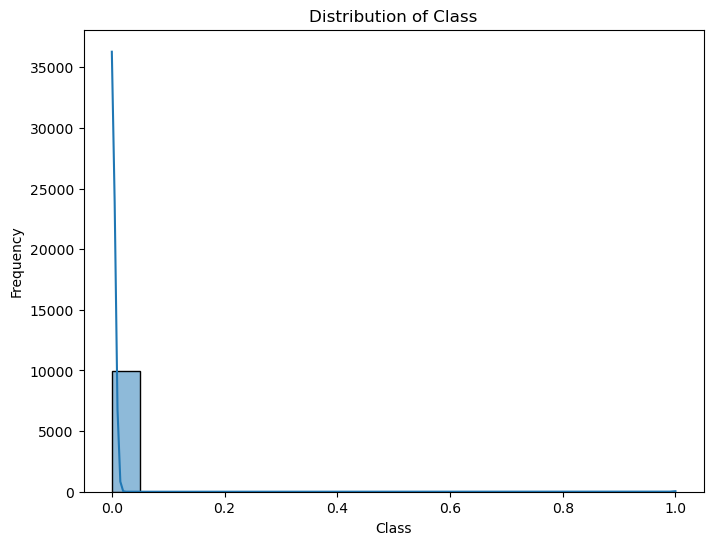

In [2]:
# Visualize the distribution of each numerical column
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Define and train the machine learning models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       1.00      0.40      0.57         5

    accuracy                           1.00      2000
   macro avg       1.00      0.70      0.79      2000
weighted avg       1.00      1.00      1.00      2000

Support Vector Machine Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.00      0.00      0.00         5

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000



/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Neural Network Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.00      0.00      0.00         5

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Decision Tree Accuracy: 0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.75      0.60      0.67         5

    accuracy                           1.00      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       1.00      1.00      1.00      2000

Logistic Regression Accuracy: 0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.75      0.60      0.67         5

    accuracy                           1.00      2000
   macro avg       0.87      

/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Gradient Boosting Accuracy: 0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.75      0.60      0.67         5

    accuracy                           1.00      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       1.00      1.00      1.00      2000



In [5]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each model
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

nn_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}


In [6]:
# Define hyperparameter grid for each model
param_grids = [rf_params, svm_params, nn_params, dt_params, lr_params, gb_params]

# Perform grid search with cross-validation for each model
best_estimators = {}

for name, model, param_grid in zip(models.keys(), models.values(), param_grids):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best {name} Parameters: {grid_search.best_params_}")



Fitting 3 folds for each of 162 candidates, totalling 486 fits


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, ma

/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
224 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_c

Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.2s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.8s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.9s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END ....................................C=1, kernel=rbf; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.7s
[CV] END .................................C=1, kernel=linear; total t

/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_con

Best Decision Tree Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.3s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.3s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.4s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.4s


/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END ................................C=0.1, solver=lbfgs; total time=   0.3s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.3s
[CV] END ..............................C=1, solver=liblinear; total time=   0.5s
[CV] END ..............................C=1, solver=liblinear; total time=   0.5s
[CV] END ..................................C=1, solver=lbfgs; total time=   0.4s
[CV] END ..............................C=1, solver=liblinear; total time=   0.5s


/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END ..................................C=1, solver=lbfgs; total time=   0.4s
[CV] END ..................................C=1, solver=lbfgs; total time=   0.4s
[CV] END .............................C=10, solver=liblinear; total time=   0.6s
[CV] END .............................C=10, solver=liblinear; total time=   0.6s
[CV] END .................................C=10, solver=lbfgs; total time=   0.3s


/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................C=10, solver=liblinear; total time=   0.5s
[CV] END .................................C=10, solver=lbfgs; total time=   0.3s
[CV] END .................................C=10, solver=lbfgs; total time=   0.3s


/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best Logistic Regression Parameters: {'C': 1, 'solver': 'liblinear'}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   7.2s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   7.5s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=  10.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=  14.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=  15.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=  24.7s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=  26.3s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   9.6s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=  12.5s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   8.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200

In [7]:
# Retrain the best models with the best hyperparameters on the entire training set
for name, model in best_estimators.items():
    model.fit(X_train, y_train)

# Evaluate the best models on the testing set
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best {name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

Best Random Forest Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       1.00      0.20      0.33         5

    accuracy                           1.00      2000
   macro avg       1.00      0.60      0.67      2000
weighted avg       1.00      1.00      1.00      2000

Best Support Vector Machine Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.00      0.00      0.00         5

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Best Neural Network Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.00      0.00      0.00         5

    accuracy                           1.00      2000
   macro av

/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [8]:
# Evaluate the best models on the testing set
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best {name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))


Best Random Forest Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       1.00      0.20      0.33         5

    accuracy                           1.00      2000
   macro avg       1.00      0.60      0.67      2000
weighted avg       1.00      1.00      1.00      2000

Best Support Vector Machine Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.00      0.00      0.00         5

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Best Neural Network Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       0.00      0.00      0.00         5

    accuracy                           1.00      2000
   macro av

/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chrisretana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu